In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
healthdata = pd.read_csv(r"C:\Users\shrey\OneDrive\Documents\Fundamental of MAchine Learning\Datasets\Healthcare1\healthcare\ntrarogyaseva.csv")

In [3]:
healthdata.head()


,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
0,1,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,06/08/2013 00:00:00,07/09/2013 00:00:00,NO,NaN,D
1,2,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,08/08/2013 00:00:00,09/09/2013 00:00:00,NO,NaN,D
2,3,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,...,11500,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,15/08/2013 00:00:00,18/10/2013 00:00:00,NO,NaN,D
3,4,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,24/08/2013 00:00:00,27/09/2013 00:00:00,NO,NaN,D
4,5,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Thandemvalasa,Srikakulam,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,31/08/2013 00:00:00,02/10/2013 00:00:00,NO,NaN,D


In [4]:
#see all the columns of the data
healthdata.columns

Index(['   ', 'AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_LOCATION', 'HOSP_DISTRICT',
       'SURGERY_DATE', 'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION'],
      dtype='object')

In [5]:
healthdata.info()
#24 columns
#479688 entires 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479688 entries, 0 to 479687
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0                     479688 non-null  int64 
 1   AGE               479688 non-null  int64 
 2   SEX               479688 non-null  object
 3   CASTE_NAME        479688 non-null  object
 4   CATEGORY_CODE     479688 non-null  object
 5   CATEGORY_NAME     479688 non-null  object
 6   SURGERY_CODE      479688 non-null  object
 7   SURGERY           479688 non-null  object
 8   VILLAGE           479688 non-null  object
 9   MANDAL_NAME       479688 non-null  object
 10  DISTRICT_NAME     479688 non-null  object
 11  PREAUTH_DATE      479688 non-null  object
 12  PREAUTH_AMT       479688 non-null  int64 
 13  CLAIM_DATE        479688 non-null  object
 14  CLAIM_AMOUNT      479688 non-null  int64 
 15  HOSP_NAME         479688 non-null  object
 16  HOSP_TYPE         479688 non-null  obj

In [6]:
#counting 
healthdata["AGE"].value_counts()

0      17513
50     16191
55     15184
45     15052
60     13732
       ...  
97         4
107        2
99         1
101        1
100        1
Name: AGE, Length: 102, dtype: int64

In [7]:
healthdata["SEX"].value_counts()
#take Male and MALE as one
#take Female and FEMALE as one

Male             260718
Female           178947
Male(Child)       25068
Female(Child)     14925
FEMALE               21
MALE                  9
Name: SEX, dtype: int64

In [8]:
replacevals = {'Male' : 'MALE', 'Female' : 'FEMALE', 'Female(Child)' : 'GIRL', 'Male(Child)' : 'BOY' }

In [9]:
healthdata["SEX"] = healthdata["SEX"].replace(replacevals)

In [10]:
healthdata["SEX"].value_counts()
#now we only have MALE and FEMALE

MALE      260727
FEMALE    178968
BOY        25068
GIRL       14925
Name: SEX, dtype: int64

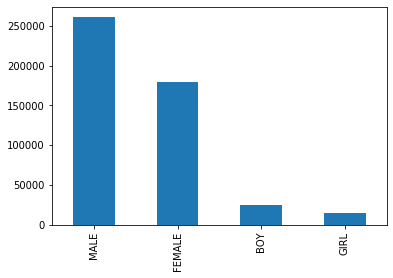

In [11]:
#plotting all the sexes
import seaborn as sns
from scipy import stats
healthdata["SEX"].value_counts().plot.bar()

In [12]:
healthdata["CATEGORY_NAME"].value_counts()

NEPHROLOGY                             74947
MEDICAL ONCOLOGY                       70158
POLY TRAUMA                            64837
CARDIAC AND CARDIOTHORACIC SURGERY     44201
GENITO URINARY SURGERIES               40514
GENERAL SURGERY                        24309
PEDIATRICS                             21574
RADIATION ONCOLOGY                     19038
CARDIOLOGY                             18629
ORTHOPEDIC  SURGERY AND PROCEDURES     15780
OPHTHALMOLOGY  SURGERY                 14790
NEUROLOGY                              13361
ENT  SURGERY                           12101
NEUROSURGERY                           10917
SURGICAL ONCOLOGY                      10731
PULMONOLOGY                             4630
PEDIATRIC SURGERIES                     4132
GASTROENTEROLOGY                        3969
GYNAECOLOGY AND OBSTETRICS  SURGERY     3719
CRITICAL CARE                           2321
PLASTIC SURGERY                         1682
GENERAL MEDICINE                        1366
SURGICAL G

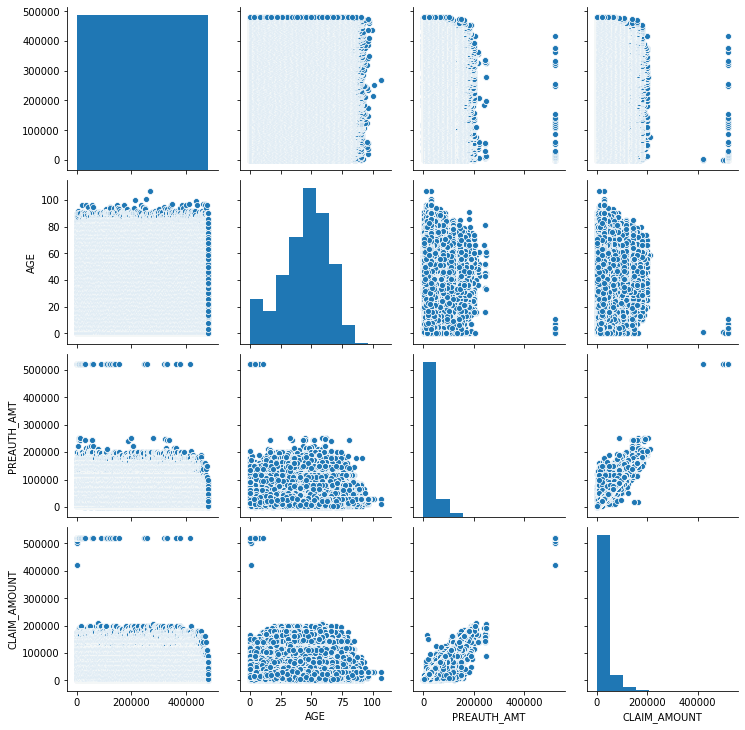

In [13]:
sns.pairplot(healthdata)

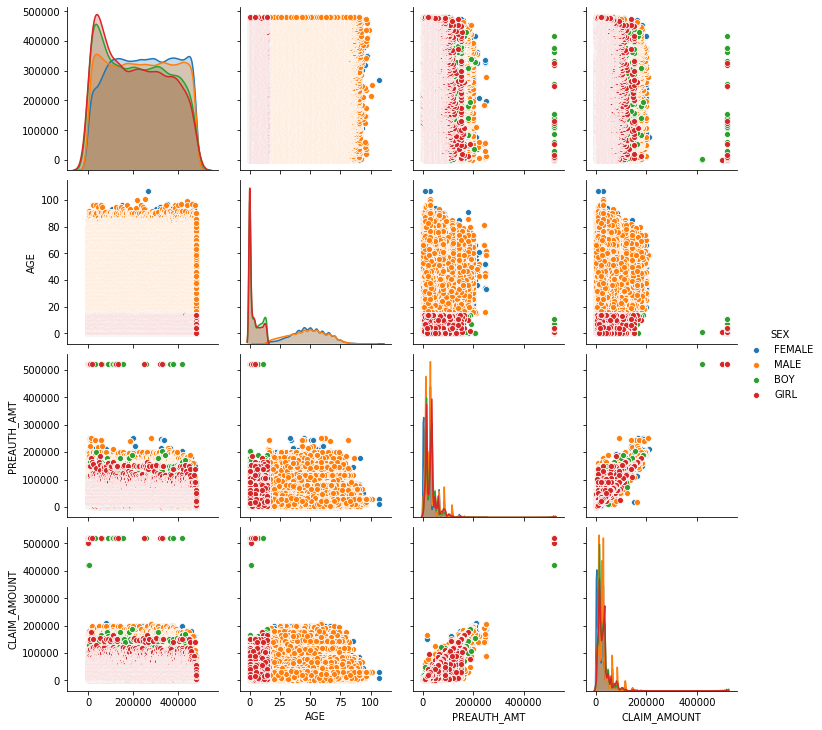

In [14]:
sns.pairplot(healthdata, hue = "SEX")

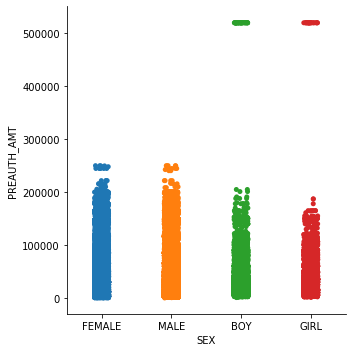

In [15]:

sns.catplot(x="SEX", y="PREAUTH_AMT", data=healthdata)

Text(0.5, 1.0, 'Boxplot of age')

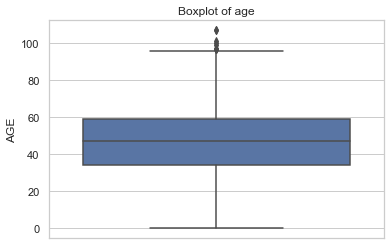

In [16]:
sns.set(style = "whitegrid")
boxvis = sns.boxplot(y= healthdata["AGE"])
plt.title('Boxplot of age')

In [17]:
print('Mean of age =', healthdata["AGE"].mean())
print('Median of age=', healthdata["AGE"].median())

Mean of age = 44.91226380480646
Median of age= 47.0


In [24]:
#data of one category
#Let's take data of Dermatology
dataderma = healthdata[healthdata["CATEGORY_NAME"]== "DERMATOLOGY"]

In [25]:
dataderma.head()

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
2488,2489,67,FEMALE,BC,M9,DERMATOLOGY,M9.1,Medical management of Pemphigus,Ward-13,Visakhapatnam,...,20570,King George Hospital,G,VISAKHAPATNAM,Vishakhapatnam,17/02/2016 00:00:00,09/03/2016 00:00:00,NO,NaN,D
5594,5595,42,MALE,BC,M9,DERMATOLOGY,M9.1,Medical management of Pemphigus,Yenduva,Ganguvarisigadam,...,20570,King George Hospital,G,VISAKHAPATNAM,Vishakhapatnam,16/04/2016 00:00:00,27/04/2016 00:00:00,NO,NaN,D
6910,6911,32,MALE,BC,M9,DERMATOLOGY,M9.2,Medical management of Toxic Epidermal Necrolysis,Ward-11,Bheemunipatnam,...,26100,King George Hospital,G,VISAKHAPATNAM,Vishakhapatnam,02/05/2016 00:00:00,24/05/2016 00:00:00,NO,NaN,CMO
7282,7283,42,MALE,BC,M9,DERMATOLOGY,M9.1,Medical management of Pemphigus,Pedapadu,Atchutapuram,...,24170,King George Hospital,G,VISAKHAPATNAM,Vishakhapatnam,05/05/2016 00:00:00,11/05/2016 00:00:00,NO,NaN,D
8111,8112,33,FEMALE,OC,M9,DERMATOLOGY,M9.3,Medical management of Stevens- Johnson Syndrome,Ward-8,YSR,...,18056,Govt General Hospital Kurnool,G,KURNOOL,Kurnool,18/05/2016 00:00:00,24/05/2016 00:00:00,NO,NaN,D


In [26]:
#lets see how many people from each district in dermatology
for i in healthdata[healthdata["CATEGORY_NAME"]== "DERMATOLOGY"]:
    print(healthdata['DISTRICT_NAME'].unique())


['Srikakulam' 'Kurnool' 'Vizianagaram' 'Guntur' 'Vishakhapatnam'
 'West Godavari' 'Krishna' 'East Godavari' 'Prakasam' 'Nellore'
 'YSR Kadapa' 'Chittoor' 'Anantapur']
['Srikakulam' 'Kurnool' 'Vizianagaram' 'Guntur' 'Vishakhapatnam'
 'West Godavari' 'Krishna' 'East Godavari' 'Prakasam' 'Nellore'
 'YSR Kadapa' 'Chittoor' 'Anantapur']
['Srikakulam' 'Kurnool' 'Vizianagaram' 'Guntur' 'Vishakhapatnam'
 'West Godavari' 'Krishna' 'East Godavari' 'Prakasam' 'Nellore'
 'YSR Kadapa' 'Chittoor' 'Anantapur']
['Srikakulam' 'Kurnool' 'Vizianagaram' 'Guntur' 'Vishakhapatnam'
 'West Godavari' 'Krishna' 'East Godavari' 'Prakasam' 'Nellore'
 'YSR Kadapa' 'Chittoor' 'Anantapur']
['Srikakulam' 'Kurnool' 'Vizianagaram' 'Guntur' 'Vishakhapatnam'
 'West Godavari' 'Krishna' 'East Godavari' 'Prakasam' 'Nellore'
 'YSR Kadapa' 'Chittoor' 'Anantapur']
['Srikakulam' 'Kurnool' 'Vizianagaram' 'Guntur' 'Vishakhapatnam'
 'West Godavari' 'Krishna' 'East Godavari' 'Prakasam' 'Nellore'
 'YSR Kadapa' 'Chittoor' 'Anantapur'